# Titanic - Machine Learning from Disaster

## Data Processing

### Imports

In [68]:
# for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import LabelEncoder

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Acquire Data

In [69]:
train_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Competitions/sub/Kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster/Datasets/Raw%20Datasets/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Competitions/sub/Kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster/Datasets/Raw%20Datasets/test.csv')
combined_data = [train_data, test_data]

### Data Processing

#### Analyze by describing data

##### **Which features are available in the dataset?**
*PassengerId, Survive*d, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

##### **Which features are categorical? Which features are ordinal?** 
- Ordinal:
  - Pclass (1: Upper, 2: Middle, 3: Lower)
- Categorical:
  - Survived (1: True, 0: False)
  - Sex (Male, Female)
  - Embarked (C: Cherbourg, Q: Queenstown, S: Southampton)

##### **Which features are numerical? Which features are not?**
- Numerical features:
  - Continous: *Fare, Age*
  - Discrete: *PassengerId, Survived, Pclass, SibSp, Parch*
- Non-Numerical features: *Name, Sex, Ticket, Cabin, Embarked*

##### **Which features are mixed data types?**
*Ticket, Cabin*

##### **Which features may contain errors or typos?**
*Name: As it contains multiple formats*

##### **Which features contain blank, null or empty values?**
- Train data: *Age, Cabin, Embarked*
- Test data: *Age, Cabin, Embarked, Fare*

##### **What are the data types for various features?**
- PassengetId: int64
- Pclass: int64
- Name: object
- Sex: object
- Age: float64
- SibSp: int64
- Parch: int64
- Ticket: object
- Fare: float64
- Cabin: object
- Embarked: object

##### **What is the distribution of numerical feature values across the samples**
- About 38% of the passengers have survived.
- Very few passengers paied significantly higher fare than others.
- Age mean is around 29, however a few passengers are aged (maximum age is 80).



##### **What is the distribution of categorical features? Are entries for a feature all unique?**
- All names are across unique.
- Most passengers are male.
- Most passengers embarked from port S(Southampton).


#### Assumtions based on the data description

##### **Completing**
- We want to complete the *Age* as it is correlated to the survival rate.
- We want to complete the *Embakred* as it might also correlate with survival or another important feature.

##### **Correcting**
- *Ticket* must be dropped because it does not have any correlation to the survival rate, and also contains lots of duplicate values.
- *Cabin* may also be dropped due to its lack of entries (75% of the entries are NULL).
- *PassengerId* may also be dropped as it does not seem to have correlation to the survival rate.
- *Name* also does not have a currect format, so we might have to drop it.

##### **Creating**
- We might want to create a new feature called *Family* based on *Parch* and *SibSP* members as they form a family.
- We may also want to extract some information from the *Name* feature before dropping it as it might provide useful information.
- *Age* can be devived into a few groups instead of being descrete. (Do 28 & 29 year-olds differ really?)
- We may also want to do use the same technique with *Age* to the *Fare* feature.

#### Analyze by pivoting features


Analysis results
- Passengers with Pclass of 1 had significantly higher survival chance
- Female passengers had higher change of survival
- Passengers with 1 or 2 SibSp had higher change of survival
- Passengers with 1-3 Parch on board where likely to have survived

In [70]:
# Passengers with Pclass of 1 had significantly higher survival chance
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [71]:
# Female passengers had higher change of survival
train_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [72]:
# Passengers with 1 or 2 SibSp had higher change of survival
train_data[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [73]:
# Passengers with 1-3 Parch on board where likely to have survived
train_data[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


#### Analyze by visualizing data

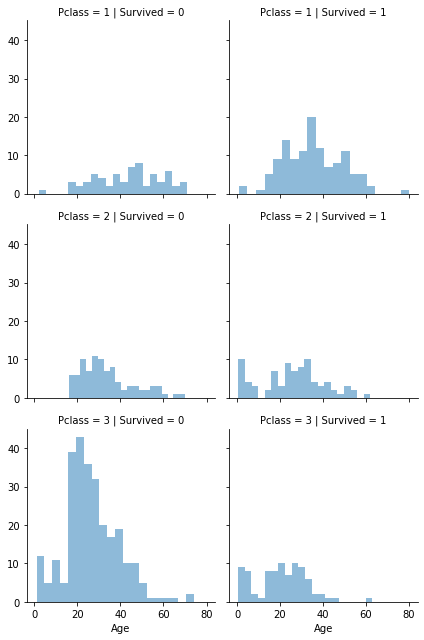

In [74]:
# Passengers in Pclass 1 had the highest chance of survival
graph = sns.FacetGrid(data = train_data, col = 'Survived', row = 'Pclass')
graph.map(plt.hist, 'Age', bins = 20, alpha = 0.5)

#### Data Wrangling, correcting, cleanup, ...

In [75]:
combined = [train_data, test_data]

##### Drop columns 'Ticket', 'PassengerId' and 'Cabin'

In [76]:
PassengerId = test_data['PassengerId']

for dataset in combined_data:
  dataset.drop(columns = ['Ticket', 'Cabin'], inplace = True)
  dataset.drop(columns = ['PassengerId'], inplace = True)

train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


##### Feature Engineer the 'Name' column, the safely remove the column

In [77]:
for dataset in combined:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [78]:
rare_titles = train_data.pivot_table(index = ['Title'], aggfunc = 'size').sort_values(ascending = False)[4:].index.to_list()
rare_dictionary = dict(zip(rare_titles, ['Rare' for i in range(len(rare_titles))]))

for dataset in combined:
  dataset['Title'] = dataset['Title'].replace(rare_dictionary)

  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby('Title', as_index = False).mean().sort_values('Survived', ascending = False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.697802
0,Master,0.575000
4,Rare,0.444444
2,Mr,0.156673


In [79]:
for dataset in combined:
  encoder = LabelEncoder()  # Define new encoder
  dataset['Title'] = encoder.fit_transform(dataset['Title'])  # Encode the feature
  dataset.drop(columns = ['Name'], inplace = True)  # Drop the un-used feature

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,2


##### Correcting the data

In [80]:
for dataset in combined_data:
  dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
  dataset['Embarked'] = dataset['Embarked'].fillna('C')

##### Encode categorical features

In [81]:
for dataset in combined:
  dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
  dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,2


##### More feature extraction On 'Age', 'Fare'

In [82]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 7)
train_data[['AgeBand', 'Survived']].groupby('AgeBand', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

for dataset in combined_data:
  encoder = LabelEncoder()  # Define new instance
  dataset['AgeBand'] = pd.cut(dataset['Age'], 7)  # Cut up the dataset
  dataset['AgeBand'] = encoder.fit_transform(dataset['AgeBand'])  # Encode

  dataset.drop(columns = ['Age'], inplace = True)  # Safely remove the 'Age'

train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,0,7.2500,0,2,1
1,1,1,1,1,0,71.2833,1,3,3
2,1,3,1,0,0,7.9250,0,1,2
3,1,1,1,1,0,53.1000,0,3,3
4,0,3,0,0,0,8.0500,0,2,3


In [83]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
# train_data[['FareBand', 'Survived']].groupby('FareBand', as_index = False).mean().sort_values(by = 'FareBand', ascending = False)

for dataset in combined_data:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3

  dataset['Fare'] = dataset['Fare'].astype(int)   

train_data.drop(columns = ['FareBand'], inplace = True)  # Safely remove the 'Fare'
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,0,0,0,2,1
1,1,1,1,1,0,3,1,3,3
2,1,3,1,0,0,1,0,1,2
3,1,1,1,1,0,3,0,3,3
4,0,3,0,0,0,1,0,2,3


##### Feature extraction on 'Parch' and 'SibSp' columns

In [84]:
for dataset in combined:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [85]:
for dataset in combined:
  dataset['isAlone'] = 0
  dataset['isAlone'][dataset['FamilySize'] == 1] = 1

  # Now remove 'Parch', 'SibSp' and 'FamilySize'
  dataset.drop(columns = ['SibSp', 'Parch', 'FamilySize'], inplace = True)

# train_data[['isAlone', 'Survived']].groupby('isAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)
train_data.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeBand,isAlone
0,0,3,0,0,0,2,1,0
1,1,1,1,3,1,3,3,0
2,1,3,1,1,0,1,2,1
3,1,1,1,3,0,3,3,0
4,0,3,0,1,0,2,3,1


## Model, predict and solve

### Imports

In [86]:
# machine learning libraries
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Data preperation

In [87]:
X_train = train_data.copy()
X_train.drop(columns = ['Survived'], inplace = True)
Y_train = train_data['Survived'].copy()
X_test = test_data.copy()

### Models

##### Logistic Regression

In [88]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)
logreg_Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Logistic Regression Accuracy: ', round(acc_log), '%', sep = '')

Logistic Regression Accuracy: 79%


##### Support Vector Machines

In [89]:
svc = SVC()

svc.fit(X_train, Y_train)
svc_Y_pred = svc.predict(X_test)

acc_svc = svc.score(X_train, Y_train) * 100
print('Support Vector Machine Accuracy: ', round(acc_svc), '%', sep = '')

Support Vector Machine Accuracy: 82%


##### K-Nearest Neighbors

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)

acc_knn = knn.score(X_train, Y_train) * 100
print('K-Nearest Neighbors Accuracy: ', round(acc_knn), '%', sep = '')

K-Nearest Neighbors Accuracy: 85%


##### Gaussian Naive Bayes

In [91]:
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)

acc_gaussian = gaussian.score(X_train, Y_train) * 100
print('Gaussian Naive Bayes Accuracy: ', round(acc_gaussian), '%', sep = '')

Gaussian Naive Bayes Accuracy: 78%


##### Perceptron

In [92]:
perceptron = Perceptron()

perceptron.fit(X_train, Y_train)
perceptron_Y_pred = perceptron.predict(X_test)

acc_perceptron = perceptron.score(X_train, Y_train) * 100
print('perceptron Accuracy: ', round(acc_perceptron), '%', sep = '')

perceptron Accuracy: 80%


##### Linear SVC

In [93]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, Y_train)
linear_svc_Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, Y_train) * 100
print('Linear SVC Accuracy: ', round(acc_linear_svc), '%', sep = '')

Linear SVC Accuracy: 79%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### Stochastic Gradient Descent

In [94]:
sgd = SGDClassifier()

sgd.fit(X_train, Y_train)
sgd_Y_pred = sgd.predict(X_test)

acc_sgd = sgd.score(X_train, Y_train) * 100
print('Stochastic Gradient Descent Accuracy: ', round(acc_sgd), '%', sep = '')

Stochastic Gradient Descent Accuracy: 78%


##### Decision Tree

In [95]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)

acc_decision_tree = decision_tree.score(X_train, Y_train) * 100
print('Decision Tree Accuracy: ', round(acc_decision_tree), '%', sep = '')

Decision Tree Accuracy: 88%


##### Random Forest

In [96]:
random_forest = RandomForestClassifier(n_estimators = 100)

random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Random Forest Accuracy: ', round(acc_random_forest), '%', sep = '')

Random Forest Accuracy: 88%


### Validations

In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Decision Tree,87.991021
3,Random Forest,87.990000
1,KNN,85.072952
0,Support Vector Machines,82.491582
5,Perceptron,79.910213
7,Linear SVC,79.461279
2,Logistic Regression,78.790000
6,Stochastic Gradient Decent,78.451178
4,Naive Bayes,77.553311


### Submission

In [102]:
submission = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': decision_tree_Y_pred
})

submission.to_csv('submission.csv', index = False)